In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump

In [2]:
data = pd.DataFrame({'ID' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'Name' : ['John', 'Jack', 'Mariah', 'Krishna', 'Danny', 'Lisa', 'Andrew', 'Ravi', 'Garima', 'Kavita'],
             'Gender' :['Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female'],
              'Profession' : ['Manager', 'Manager', 'Developer', 'Team Lead', 'Team Lead', 'Assistant Manager', 'Assistant Manager', 'Manager', 'Assistant Manager', 'CEO'],
              'Salary' : [100000, 120000, 95000, 99000, 105000, 145000, 155000, 78000, 167000, 195000],
              'Experience' : [10, 13, 6, 8, 10, 13, 19, 15, 20, 24]})

In [3]:
data

,ID,Name,Gender,Profession,Salary,Experience
0,1,John,Male,Manager,100000,10
1,2,Jack,Male,Manager,120000,13
2,3,Mariah,Female,Developer,95000,6
3,4,Krishna,Male,Team Lead,99000,8
4,5,Danny,Male,Team Lead,105000,10
5,6,Lisa,Female,Assistant Manager,145000,13
6,7,Andrew,Male,Assistant Manager,155000,19
7,8,Ravi,Male,Manager,78000,15
8,9,Garima,Female,Assistant Manager,167000,20
9,10,Kavita,Female,CEO,195000,24


In [4]:
data.describe()

,ID,Salary,Experience
count,10.00000,10.000000,10.000000
mean,5.50000,125900.000000,13.800000
std,3.02765,37698.953714,5.731007
min,1.00000,78000.000000,6.000000
25%,3.25000,99250.000000,10.000000
50%,5.50000,112500.000000,13.000000
75%,7.75000,152500.000000,18.000000
max,10.00000,195000.000000,24.000000


### Explore the data types

In [5]:
data.dtypes

ID             int64
Name          object
Gender        object
Profession    object
Salary         int64
Experience     int64
dtype: object

### Separating categorical and numeric features

In [59]:
dictionary={}
dictionary['num'] = data.dtypes[data.dtypes=='int64'].index
dictionary['cat'] = data.dtypes[data.dtypes=='object'].index
dictionary

{'num': Index(['ID', 'Salary', 'Experience'], dtype='object'),
 'cat': Index(['Name', 'Gender', 'Profession'], dtype='object')}

### Cardinality of Categorical Variables

In [60]:
data['Name'].unique()

array(['John', 'Jack', 'Mariah', 'Krishna', 'Danny', 'Lisa', 'Andrew',
       'Ravi', 'Garima', 'Kavita'], dtype=object)

In [61]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [62]:
data['Profession'].unique()

array(['Manager', 'Developer', 'Team Lead', 'Assistant Manager', 'CEO'],
      dtype=object)

### Frequency of categories in a categorical variable

In [63]:
data['Name'].value_counts()

Danny      1
Krishna    1
Kavita     1
John       1
Ravi       1
Mariah     1
Garima     1
Jack       1
Lisa       1
Andrew     1
Name: Name, dtype: int64

In [64]:
data['Gender'].value_counts()

Male      6
Female    4
Name: Gender, dtype: int64

In [65]:
data['Profession'].value_counts()

Manager              3
Assistant Manager    3
Team Lead            2
Developer            1
CEO                  1
Name: Profession, dtype: int64

<AxesSubplot:>

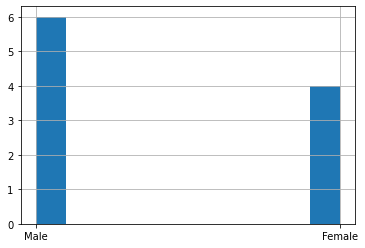

In [66]:
data['Gender'].hist()

<AxesSubplot:>

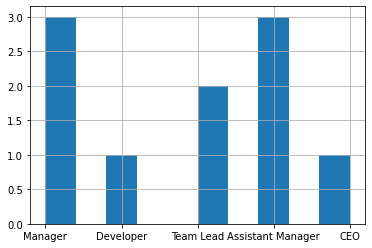

In [67]:
data['Profession'].hist()

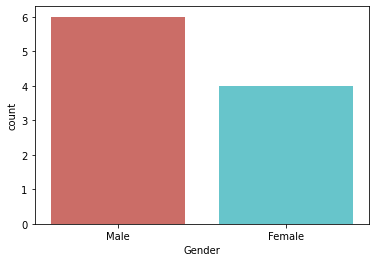

In [68]:
sns.countplot(x='Gender',data=data,palette='hls')
plt.show()

#### Numerical Variables

<AxesSubplot:>

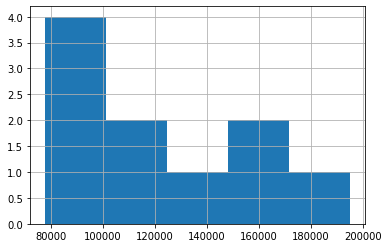

In [69]:
data['Salary'].hist(bins=5)

In [70]:
data[dictionary['cat']]

,Name,Gender,Profession
0,John,Male,Manager
1,Jack,Male,Manager
2,Mariah,Female,Developer
3,Krishna,Male,Team Lead
4,Danny,Male,Team Lead
5,Lisa,Female,Assistant Manager
6,Andrew,Male,Assistant Manager
7,Ravi,Male,Manager
8,Garima,Female,Assistant Manager
9,Kavita,Female,CEO


In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [72]:
# Profession column is ordinal data. Hence I can use the label encoder

le_profession = LabelEncoder()
le_profession.fit(data['Profession'])

LabelEncoder()

In [73]:
le_profession.classes_

array(['Assistant Manager', 'CEO', 'Developer', 'Manager', 'Team Lead'],
      dtype=object)

fit method learns the transformer's attributes. It does not change the column.
To change the column we will now use the learnt attribute to do the transformation by using transform function

In [74]:
data['Profession'] = le_profession.transform(data['Profession'])
data

,ID,Name,Gender,Profession,Salary,Experience
0,1,John,Male,3,100000,10
1,2,Jack,Male,3,120000,13
2,3,Mariah,Female,2,95000,6
3,4,Krishna,Male,4,99000,8
4,5,Danny,Male,4,105000,10
5,6,Lisa,Female,0,145000,13
6,7,Andrew,Male,0,155000,19
7,8,Ravi,Male,3,78000,15
8,9,Garima,Female,0,167000,20
9,10,Kavita,Female,1,195000,24


In [75]:
le_profession.inverse_transform(data['Profession'])

array(['Manager', 'Manager', 'Developer', 'Team Lead', 'Team Lead',
       'Assistant Manager', 'Assistant Manager', 'Manager',
       'Assistant Manager', 'CEO'], dtype=object)

In [76]:
# Gender is nominal data because it cannot be ranked. Hence we will apply one hot encoder

pd.get_dummies(data['Gender'])

,Female,Male
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [77]:
data.drop(['Name'], inplace = True, axis = 1)
data

,ID,Gender,Profession,Salary,Experience
0,1,Male,3,100000,10
1,2,Male,3,120000,13
2,3,Female,2,95000,6
3,4,Male,4,99000,8
4,5,Male,4,105000,10
5,6,Female,0,145000,13
6,7,Male,0,155000,19
7,8,Male,3,78000,15
8,9,Female,0,167000,20
9,10,Female,1,195000,24


In [78]:
data = pd.get_dummies(data)
data

,ID,Profession,Salary,Experience,Gender_Female,Gender_Male
0,1,3,100000,10,0,1
1,2,3,120000,13,0,1
2,3,2,95000,6,1,0
3,4,4,99000,8,0,1
4,5,4,105000,10,0,1
5,6,0,145000,13,1,0
6,7,0,155000,19,0,1
7,8,3,78000,15,0,1
8,9,0,167000,20,1,0
9,10,1,195000,24,1,0


#### Scaling Numerical Variables using MinMax

In [80]:
min_max_sal = MinMaxScaler()
min_max_sal.fit(data[['Salary']])

MinMaxScaler()

In [82]:
min_max_sal.data_max_, min_max_sal.data_min_

(array([195000.]), array([78000.]))

In [83]:
data

,ID,Profession,Salary,Experience,Gender_Female,Gender_Male
0,1,3,100000,10,0,1
1,2,3,120000,13,0,1
2,3,2,95000,6,1,0
3,4,4,99000,8,0,1
4,5,4,105000,10,0,1
5,6,0,145000,13,1,0
6,7,0,155000,19,0,1
7,8,3,78000,15,0,1
8,9,0,167000,20,1,0
9,10,1,195000,24,1,0


In [16]:
min_max_sal.data_max_

array([195000.])

In [84]:
data['Salary_min_max_scaled'] = min_max_sal.transform(data[['Salary']])
data

,ID,Profession,Salary,Experience,Gender_Female,Gender_Male,Salary_min_max_scaled
0,1,3,100000,10,0,1,0.188034
1,2,3,120000,13,0,1,0.358974
2,3,2,95000,6,1,0,0.145299
3,4,4,99000,8,0,1,0.179487
4,5,4,105000,10,0,1,0.230769
5,6,0,145000,13,1,0,0.572650
6,7,0,155000,19,0,1,0.658120
7,8,3,78000,15,0,1,0.000000
8,9,0,167000,20,1,0,0.760684
9,10,1,195000,24,1,0,1.000000


In [85]:
data.describe()

,ID,Profession,Salary,Experience,Gender_Female,Gender_Male,Salary_min_max_scaled
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,2.000000,125900.000000,13.800000,0.400000,0.600000,0.409402
std,3.02765,1.632993,37698.953714,5.731007,0.516398,0.516398,0.322213
min,1.00000,0.000000,78000.000000,6.000000,0.000000,0.000000,0.000000
25%,3.25000,0.250000,99250.000000,10.000000,0.000000,0.000000,0.181624
50%,5.50000,2.500000,112500.000000,13.000000,0.000000,1.000000,0.294872
75%,7.75000,3.000000,152500.000000,18.000000,1.000000,1.000000,0.636752
max,10.00000,4.000000,195000.000000,24.000000,1.000000,1.000000,1.000000


#### Scaling Numerical Variables using StandardScaler

In [86]:
std_scale_sal = StandardScaler()
std_scale_sal.fit(data[['Salary']])

StandardScaler()

In [87]:
std_scale_sal.mean_, std_scale_sal.scale_

(array([125900.]), array([35764.36774221]))

In [88]:
data['Salary_standard_scaled'] = std_scale_sal.transform(data[['Salary']])
data

,ID,Profession,Salary,Experience,Gender_Female,Gender_Male,Salary_min_max_scaled,Salary_standard_scaled
0,1,3,100000,10,0,1,0.188034,-0.724184
1,2,3,120000,13,0,1,0.358974,-0.164969
2,3,2,95000,6,1,0,0.145299,-0.863988
3,4,4,99000,8,0,1,0.179487,-0.752145
4,5,4,105000,10,0,1,0.230769,-0.584381
5,6,0,145000,13,1,0,0.572650,0.534051
6,7,0,155000,19,0,1,0.658120,0.813659
7,8,3,78000,15,0,1,0.000000,-1.339322
8,9,0,167000,20,1,0,0.760684,1.149188
9,10,1,195000,24,1,0,1.000000,1.932091


In [89]:
data.describe()

,ID,Profession,Salary,Experience,Gender_Female,Gender_Male,Salary_min_max_scaled,Salary_standard_scaled
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,5.50000,2.000000,125900.000000,13.800000,0.400000,0.600000,0.409402,-2.220446e-17
std,3.02765,1.632993,37698.953714,5.731007,0.516398,0.516398,0.322213,1.054093e+00
min,1.00000,0.000000,78000.000000,6.000000,0.000000,0.000000,0.000000,-1.339322e+00
25%,3.25000,0.250000,99250.000000,10.000000,0.000000,0.000000,0.181624,-7.451551e-01
50%,5.50000,2.500000,112500.000000,13.000000,0.000000,1.000000,0.294872,-3.746746e-01
75%,7.75000,3.000000,152500.000000,18.000000,1.000000,1.000000,0.636752,7.437570e-01
max,10.00000,4.000000,195000.000000,24.000000,1.000000,1.000000,1.000000,1.932091e+00


In [22]:
std_scale_sal.inverse_transform(data[['Salary_standard_scaled']])

array([[100000.],
       [120000.],
       [ 95000.],
       [ 99000.],
       [105000.],
       [145000.],
       [155000.],
       [ 78000.],
       [167000.],
       [195000.]])

In [91]:
dump(std_scale_sal,open('std_scaler.pkl','wb'))